Visual of calculated insights:

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#loading the data
df= pd.read_csv('transport_data.csv')

#to prevent the date to beacome string
df['Date']= pd.to_datetime(df['Date'])


In [5]:
# so we can group the date according to the weekdays --Monday,Tuesday,wednasday..
df['Day_name']=df['Date'].dt.day_name()
df.head(5)

,Route_ID,Date,Start_Time,End_Time,Passengers,Bus_Capacity,Delayed_by_Mins,Day_name,Day_type,Load_ratio,Trip_ID
0,R11,2025-07-01,7:00,7:45,60,120,8,Tuesday,Weekday,0.50,R11_2025-07-01_7:00
1,R12,2025-07-01,8:00,8:45,134,130,0,Tuesday,Weekday,1.03,R12_2025-07-01_8:00
2,R13,2025-07-01,9:00,9:45,93,90,14,Tuesday,Weekday,1.03,R13_2025-07-01_9:00
3,R14,2025-07-01,10:00,10:45,101,100,9,Tuesday,Weekday,1.01,R14_2025-07-01_10:00
4,R15,2025-07-01,11:00,11:45,91,110,0,Tuesday,Weekday,0.83,R15_2025-07-01_11:00


On which weekdays does the public transport system experience the highest accumalated?

C:\Users\Dell\AppData\Local\Temp\ipykernel_16480\3762603205.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(
C:\Users\Dell\AppData\Local\Temp\ipykernel_16480\3762603205.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


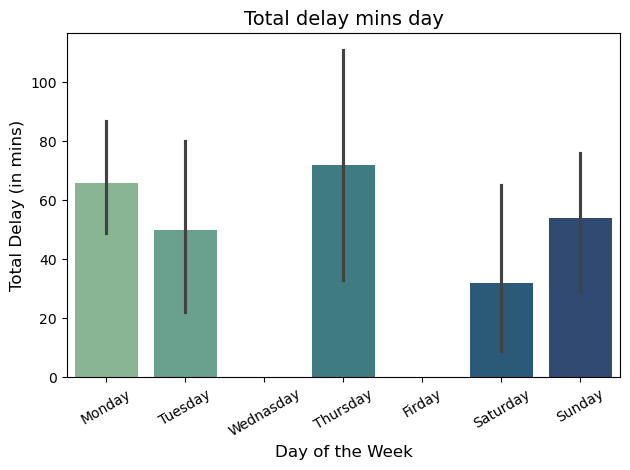

In [10]:

ax=sns.barplot(
        data=df,
        x='Day_name',
        y='Delayed_by_Mins',
        estimator='sum',
        order=['Monday','Tuesday','Wednasday','Thursday','Firday','Saturday','Sunday'],
        palette='crest'
        
)

ax.set_title('Total delay mins day',fontsize=14)
ax.set_xlabel('Day of the Week',fontsize=12)
ax.set_ylabel('Total Delay (in mins)',fontsize=12)

ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

plt.tight_layout()
plt.show()


Is there any relation between number of passengers and delay time?

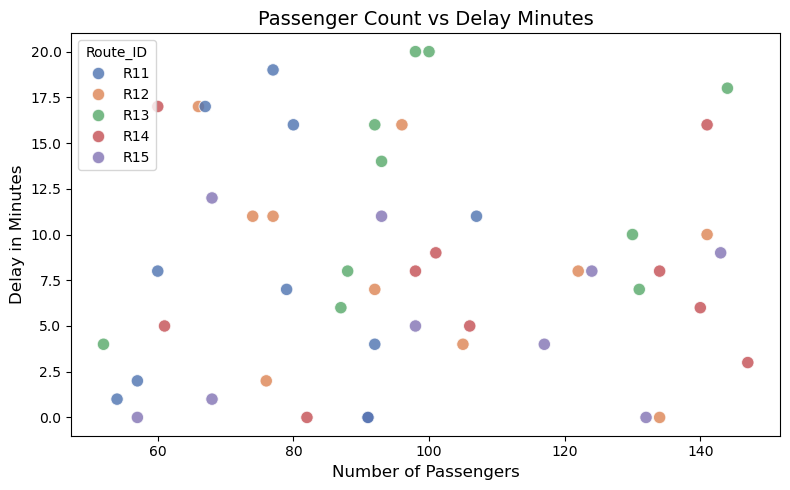

In [12]:
plt.figure(figsize=(8,5))

ax = sns.scatterplot(
        data=df,
        x='Passengers',
        y='Delayed_by_Mins',
        hue='Route_ID',
        palette='deep',
        s=80,
        alpha=0.8
)

ax.set_title('Passenger Count vs Delay Minutes',fontsize=14)
ax.set_xlabel('Number of Passengers',fontsize=12)
ax.set_ylabel('Delay in Minutes',fontsize=12)
plt.tight_layout()
plt.show()

“Which routes are operating near their full capacity, and which are underused?”



C:\Users\Dell\AppData\Local\Temp\ipykernel_12012\3892413484.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bx = sns.barplot(


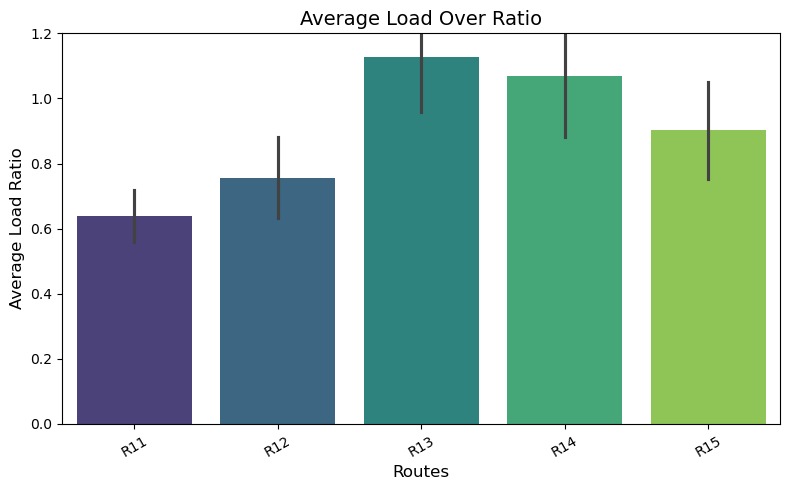

In [7]:
plt.figure(figsize=(8,5))

bx = sns.barplot(
        data=df,
        x='Route_ID',
        y='Load_ratio',
        estimator='mean',
        palette='viridis'
)

bx.set_title('Average Load Over Ratio',fontsize=14)
bx.set_xlabel('Routes',fontsize=12)
bx.set_ylabel('Average Load Ratio',fontsize=12)
plt.ylim(0,1.2)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

“Route R12 and R15 are operating with higher load ratios — indicating high demand. In contrast, R13 has lower efficiency, possibly needing attention in either promotion or route restructuring.”



“Are our buses getting more efficient over time? Or is load fluctuating randomly?”



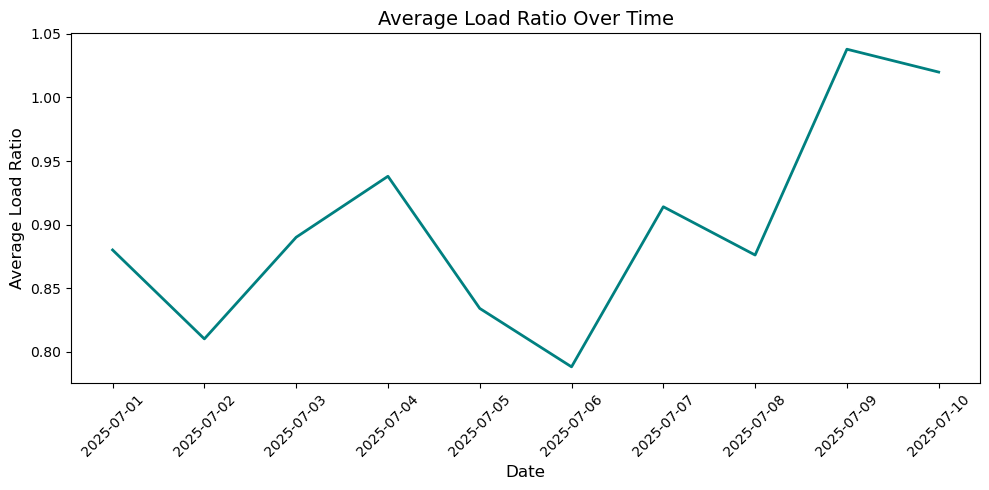

In [3]:
avg_load = df.groupby('Date')['Load_ratio'].mean().reset_index()
plt.figure(figsize=(10,5))
ax=sns.lineplot(
        data=avg_load,
        x='Date',
        y='Load_ratio',
        markers='o',
        linewidth=2,
        color='teal'
        )

ax.set_title('Average Load Ratio Over Time',fontsize=14)
ax.set_xlabel('Date',fontsize=12)
ax.set_ylabel('Average Load Ratio',fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()